# Cours "Géomatique" - GeoPandas 
### Louis Maritaud
### louis.maritaud@unilim.fr

## Objectifs pédagogiques
- Comprendre la structure d'un GeoDataFrame
- Lire et manipuler des fichiers géographiques
- Maîtriser les bases des systèmes de coordonnées (CRS)
- Créer des cartes simples avec matplotlib


# Ce qu'on a vu 
## Faire une carte simple avec Geopandas et Matplotlib
### Geopandas
Comme toutes les bibliothèques, pour s'en servir il faut l'importer. Pour aller plus vite, on peut donner un alias à une bibliothèque, en écrivant ```import bibliothèque as alias```    
```python
import geopandas as gpd
```
Geopandas permet de créer et manipuler un **GeoDataFrame**.    
Un GeoDataFrame est un tableau (= DataFrame) qui contient des informations géographiques dans une colonne ```geometry```    
On peut y trouver des **Points**, des **Lignes**, des **Polygones** et des combinaisons de tout ce qui a été dit précédemment.    
Pour créer ces objets, on peut utiliser shapely.geometry : 
```python
from shapely.geometry import Point, LineString, Polygon
```

| Nom  | Nom pour gpd |Méthode avec shapely| Type d'arguments |
|------|--------------|-| -|
|Points|POINT|```Point(x, y)```|deux floats|
|Lignes|LINESTRING|```LineString([(x,y), (x,y)])```|liste de tuples comprenant deux floats|
|Polygones|POLYGON|```Polygon([(x,y), (x,y), (x,y)])```|liste de tuples comprenant deux floats|

#### Pour créer un GeoDataFrame : 
```python
gdf = gdp.GeoDataFrame()
```
On peut créer un gdf sur la base d'un df : 
```python
df=pd.DataFrame({
    "villes":["Paris","Lyon","Tokyo"],
    "lon" : [x, x, x],
    "lat": [y, y, y]
})

gdf=gdp.GeoDataFrame(
    df,
    geometry=gdp.points_from_xy(df["lon"], df["lat"]),
    crs="EPSG:XXXX"
)
```
L'argument "crs" est le système de projection.
### Systèmes de coordonnées - CRS (Coordinate Reference System)

**Les essentiels à retenir** :

| EPSG Code | Nom | Unité | Usage |
|-----------|-----|-------|-------|
| **4326** | WGS84 | degrés | GPS, **Folium**, coordonnées géographiques |
| **2154** | Lambert 93 | mètres | France, **calculs de distances/aires** |
| **3857** | Web Mercator | mètres | Fonds de carte web (Google Maps, OSM) |

**Reprojeter dans un crs différent**
Sur un GeoDataFrame : 
```python
gdf = gdf.to_crs(epsg=EPSG CODE)
```
**Exemple pour reprojeter en Lambert 93 :**
```python
gdf = gdf.to_crs(epsg=2154)
```

## Matplotlib

Dans matplotlib (et geopandas est basé là dessus pour faire des cartes dans notre cours), on définit **deux objets** :
- La **figure** : c'est le carré blanc qui englobe le/les graphiques. Communément, on l'appelle `fg`
- L'**axe** : c'est l'endroit où l'on dessine le graphique. Communément, on l'appelle `ax`.
```python
fig, ax = plt.subplots(1, 2, figsize=(20, 20)) # Syntaxe : plt.subplots(nombre de lignes, nombre de colonnes, taille de figure)
# Tracé des données
gdf.plot(
    ax=ax,              # On trace sur l'axe
    color='red',        # Couleur
    markersize=100,     # Taille des points
    edgecolor='black',  # Contour
    linewidth=2         # Épaisseur du contour
)
ax.set_axis_off()       # On retire les axes
plt.title("Titre")      # On donne un titre à la carte
plt.show()              # On affiche la carte
```


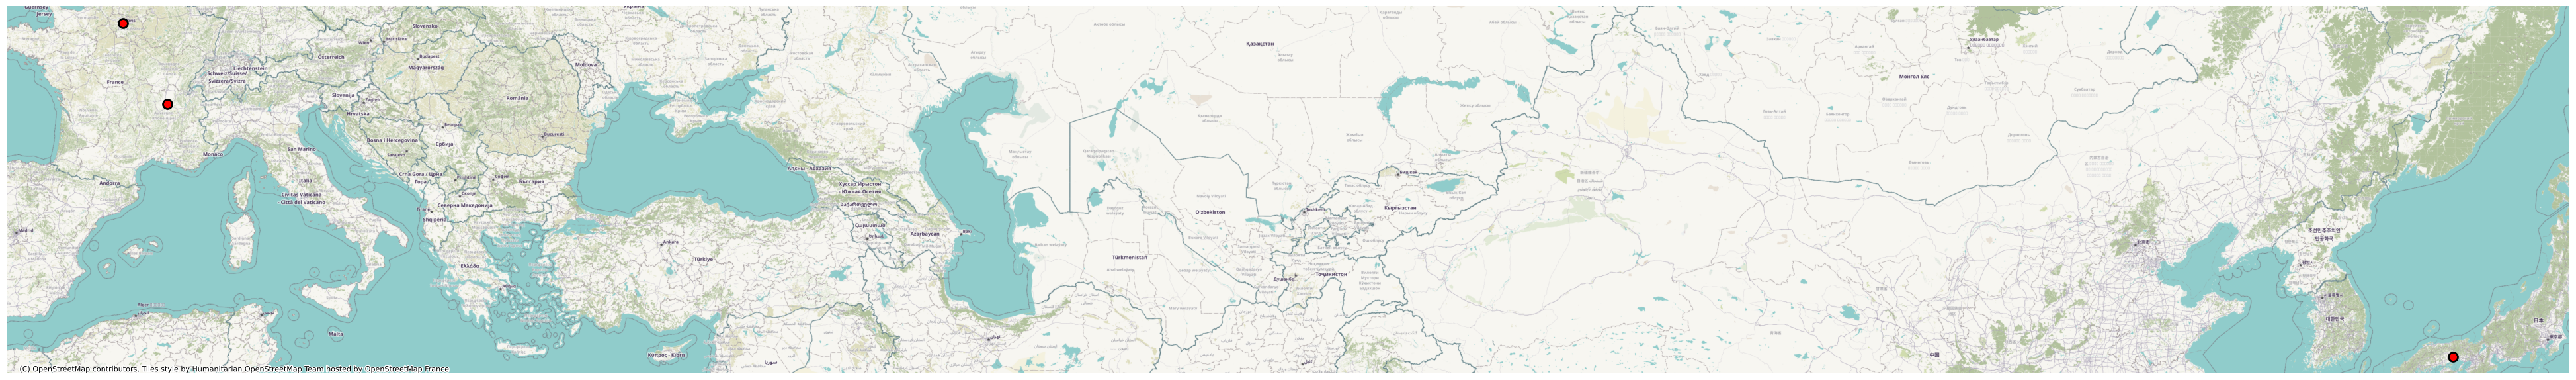

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import contextily as ctx

df=pd.DataFrame({
    "villes":["Paris","Lyon","Tokyo"],
    "lon" : [48.866667, 45.750000, 34.886306],
    "lat":[2.333333,4.850000,134.379711]
})

gdf=gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lat, df.lon),
    crs="EPSG:4326"
)

gdf = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1, figsize=(50, 50))
# Tracé des données
gdf.plot(
    ax=ax,  # Taille de la figure
    color='red',        # Couleur
    markersize=100,     # Taille des points
    edgecolor='black',  # Contour
    linewidth=2         # Épaisseur du contour
)

# Fond de carte
ctx.add_basemap(
    ax,
    zoom=6
)

# Finalisation
ax.set_axis_off()
plt.show()


# Représentation de données numériques 

In [ ]:
# Personnalisation avancée
# Carte avec légende et couleurs selon une variable
fig, ax = plt.subplots(figsize=(12, 10))

departements.plot(
    ax=ax,
    column='PTOT',        # Colorier selon la population → colonne PTOT
    cmap='YlOrRd',        # Palette de couleurs
    legend=True,
    edgecolor="black",
    legend_kwds={'label': "Population (en millions)"}
)



plt.title("Population des départements français")
plt.axis('off')  # Masquer les axes
plt.tight_layout()
plt.show()

## Palettes de couleurs disponibles pour MatPlotLib 
Visibles via ce lien    
[Palettes de couleurs disponibles avec Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)    
Ou cette commande :    

In [ ]:
from matplotlib import colormaps
list(colormaps)

# EXERCICE 3 : 
A partir du gdf des départements français qu'on manipule depuis le début, produisez une carte avec la sémiologie de votre choix qui représente les départements selon leur nombre de communes (NBCOM).    
Utilisez une autre palette de couleurs que YlOrRd.

In [ ]:
# Votre code ici

# EXERCICE 4 :
Vous opérerez une jointure des données de [l'Instituto Brasileiro de Geografia e Estatistica qui recense la population par État](https://www.ibge.gov.br). Je vous ai déjà préparé un fichier csv simplifié des données réelles, accessible à `DATA/pop_br.csv`     
A partir de cette jointure, cartographiez les États du Brésil selon leur population.

In [ ]:
# Votre code ici

# Filtrage des données, et représentation de sous ensembles

In [ ]:
# On peut déjà regarder à quoi ressemble notre gdf grâce à .head()
departements.head()

In [ ]:
#====================================================
# METHODE 1 - la plus simple, mais la plus verbeuse
#====================================================

# Filtrer par noms de départements
# On créé une liste avec les noms des départements que l'on vise, puisqu'ils sont disponibles en valeurs de notre dictionnaire
departements_na = ['Dordogne', 'Gironde', 'Landes', 'Lot-et-Garonne', 
                   'Pyrénées-Atlantiques', 'Deux-Sèvres', 'Vienne', 
                   'Haute-Vienne', 'Charente', 'Charente-Maritime', 
                   'Corrèze', 'Creuse']

nouvelle_aquitaine = departements[departements['nom'].isin(departements_na)].copy()  # .copy() pour éviter les effets de bords dont on a déjà parlé !
# La méthode isin() teste pour chaque élément d'un df si il est compris dans une liste
# Renvoie True quand c'est le cas, et du coup ne filtre que sur les True

#================================================================================================
# METHODE 2 - Légèrement plus complexe, mais implique d'avoir le nom de région dans les données
#================================================================================================

# Filtrer par nom de région

nouvelle_aquitaine_2 = departements[departements['Région']=="Nouvelle-Aquitaine"].copy() # .copy() pour éviter les effets de bords dont on a déjà parlé !

if len(nouvelle_aquitaine.compare(nouvelle_aquitaine_2)) == 0:              # .compare() renvoie un df qui contient les différences entre deux df
    print("Les deux premières méthodes renvoient les mêmes départements")
    
#========================================================
# METHODE 3 - La plus complexe, mais la plus Python-like
#========================================================

# Méthode 3 : Si un code région existe
code_na = departements["REG"].loc[departements["Région"] == "Nouvelle-Aquitaine"].iloc[0]
nouvelle_aquitaine_3 = departements[departements['REG'] == code_na].copy()  # .copy() pour éviter les effets de bords dont on a déjà parlé !
if len(nouvelle_aquitaine.compare(nouvelle_aquitaine_3)) == 0:              # .compare() renvoie un df qui contient les différences entre deux df
    print("Les trois méthodes renvoient les mêmes départements")


print(f"Nombre de départements en Nouvelle-Aquitaine : {len(nouvelle_aquitaine)}")
# Visualiser
fig, ax = plt.subplots(figsize=(10, 10))
nouvelle_aquitaine.plot(ax=ax, edgecolor='black', facecolor='#90EE90')
plt.title("Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Calculs de superficie, identification de valeurs minimum et maximum

In [ ]:
# Calcul de superficie avec gpd 
# méthode .area
nouvelle_aquitaine["superficie"]= nouvelle_aquitaine.geometry.area / 1_000_000

# Recherche de valeur max et min sur les départements de la Nouvelle-Aquitaine
plus_grand = nouvelle_aquitaine.loc[nouvelle_aquitaine['superficie'].idxmax()]
print(f"Plus grand département : {plus_grand['nom']} ({plus_grand['superficie']:.0f} km²)")

plus_petit = nouvelle_aquitaine.loc[nouvelle_aquitaine['superficie'].idxmin()]
print(f"Plus petit département : {plus_petit['nom']} ({plus_petit['superficie']:.0f} km²)")

# Exercice 5
- Filtrer une autre région (Bretagne, PACA, etc.)
- Compter le nombre de départements par région
- Identifier le plus grand département (en superficie)

In [ ]:
# Votre code ici
# Pour rappel, dans la variable departements on a déjà tous les départements :
display(departements)

## Cartes choroplèthes

In [ ]:
# Carte avec gradient de couleurs selon la population
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

nouvelle_aquitaine.plot(
    column='PTOT',     # Variable à visualiser
    cmap='YlOrRd',          # Palette : jaune / orange / rouge : Y(el)l(ow)Or(ange)R(e)d
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    ax=ax,
    legend_kwds={
        'label': "Population",
        'orientation': "horizontal",
        'shrink': 0.5
    }
)

plt.title("Population par département - Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Ajout des départements 
# Calculer les centroïdes (centres) des polygones
nouvelle_aquitaine['centroid'] = nouvelle_aquitaine.geometry.centroid

fig, ax = plt.subplots(1, 1, figsize=(14, 12))

nouvelle_aquitaine.plot(
    column='PTOT', 
    cmap='YlOrRd', 
    legend=True,
    edgecolor='black',
    linewidth=0.8,
    ax=ax
)

# Ajouter les labels au centre de chaque département
for idx, row in nouvelle_aquitaine.iterrows():
    plt.annotate(
        text=row['nom'], 
        xy=(row['centroid'].x, row['centroid'].y),
        horizontalalignment='center',
        fontsize=9,
        color='black'
    )

plt.title("Population par département - Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Exercice 6
Faites exactement la même chose sur les données du Brésil → calcul de centroïdes et ajout du nom des états au centre de chaque état

In [ ]:
# Votre code ici 

# Variables manuelles, bins et classes : vraie Choroplèthe

## Discrétisation de valeurs continues avec pandas : la méthode .cut()

In [ ]:
import matplotlib.colors as mcolors

# Définir des classes
bins = [0, 300000, 500000, 1000000, 2000000]        # On appelle "bins" les seuils de valeurs discrets
labels = ['< 300k', '300-500k', '500k-1M', '> 1M']  # labels : noms

nouvelle_aquitaine['classe_pop'] = pd.cut(    # la méthode .cut() de pandas permet de discrétiser des valeurs continues. 
    nouvelle_aquitaine['PTOT'],               # sur la colonne donnée comprenant des valeurs continues
    bins=bins,                                # On sépare les valeurs en unités discrètes
    labels=labels                             # Et on attribue à chaque classe un label prédeterminé
)
display(nouvelle_aquitaine)

## On dessine la carte avec nos valeurs discrètes 

In [ ]:
# Carte avec classes discrètes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

nouvelle_aquitaine.plot(
    column='classe_pop',     # On plot sur la colonne "classe_pop" qu'on vient de créer
    categorical=True,        # Ici n'est pas nécessaire, mais permet d'indiquer à gpd que les valeurs sont discrètes
    legend=True,             #affiche la légende
    edgecolor='black',       # contours des polygones en noir
    linewidth=0.8,           # épaisseur des contours
    cmap='RdYlGn_r',         # Inversé → _r à la fin : rouge = forte pop
    ax=ax                    # On plot sur ax
)

plt.title("Classes de population - Nouvelle-Aquitaine", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()

# Calcul de densité 

In [ ]:
# Calculer la densité (habitants/km²)
nouvelle_aquitaine_proj = nouvelle_aquitaine.to_crs("EPSG:2154")
nouvelle_aquitaine_proj['superficie_km2'] = (
    nouvelle_aquitaine_proj.geometry.area / 1_000_000
)
nouvelle_aquitaine_proj['densite'] = (
    nouvelle_aquitaine_proj['PTOT'] / 
    nouvelle_aquitaine_proj['superficie_km2']
)

# Cartographier
fig, ax = plt.subplots(figsize=(12, 12))
nouvelle_aquitaine_proj.plot(
    column='densite',
    cmap='cool',
    legend=True,
    edgecolor='black',
    ax=ax,
    legend_kwds={'label': "Densité (hab/km²)"}
)
plt.title("Densité de population")
plt.axis('off')
plt.show()

# Statistiques
print(f"Densité moyenne : {nouvelle_aquitaine_proj['densite'].mean():.1f} hab/km²")
print(f"Département le plus dense : {nouvelle_aquitaine_proj.loc[nouvelle_aquitaine_proj['densite'].idxmax(), 'nom']}")
print(f"Département le moins dense : {nouvelle_aquitaine_proj.loc[nouvelle_aquitaine_proj['densite'].idxmin(), 'nom']}")

# Exercice 7 
Calculez la densité de chaque état du Bresil, puis projetez la dans une Choroplèthe aux valeurs discrétisées. 

In [ ]:
# Votre code ici 